In [ ]:
## NEED TO USED GADI JUPYTER - 4 nodes with 250gb mem total

In [1]:
## u_along figure

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=25) #20 
rc('ytick', labelsize=25) #20
rc('axes', titlesize=25)    # fontsize of the axes title
rc('axes', labelsize=25) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

In [6]:
import dask.config
from dask.distributed import Client,LocalCluster
from dask_jobqueue import PBSCluster

c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/37419/status,
Dashboard: /proxy/37419/status,Workers: 7
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38093,Workers: 7
Dashboard: /proxy/37419/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:42583,Total threads: 4
Dashboard: /proxy/46807/status,Memory: 17.88 GiB
Nanny: tcp://127.0.0.1:36063,


In [68]:
hu = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='hu', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
hu

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [69]:
# location limits of dataset - choosing slice near totten
#lon_lim = slice(-270, -230) #slice(30, 45)#
lat_lim = slice(-79, -60) #slice(-70, -65)

hu_region = hu.sel( yu_ocean = lat_lim)

## making ualong decade average fields


In [108]:

exp_ctrl= '01deg_jra55v13_ryf9091'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

#### SET EXPT HERE
expt = exp_wthp


In [109]:
u = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/u_monthly_field' + expt +'.nc').ug_s
v = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/v_monthly_field' + expt +'.nc').vg_s

In [110]:
cd Antarctic-Eddy-Res-Compare

[Errno 2] No such file or directory: 'Antarctic-Eddy-Res-Compare'
/home/561/qo9901/Antarctic-Eddy-Res-Compare


In [73]:
## plotting everything together
cluster_mask_access = xr.open_mfdataset('largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access= cluster_mask_access.assign_coords(xu_ocean = ('xu_ocean', u.xu_ocean.data), yu_ocean = ('yu_ocean', u.yu_ocean.data))
#calculating area on shelf and slope total
area_u = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='area_u', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(xu_ocean= lon_lim, yu_ocean = lat_lim)
#circ_area_slope = (area_u*cluster_mask_access.where(mask_slope ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
#circ_area_shelf = (area_u*cluster_mask_access.where(mask_shelf ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
#circ_area_total = (area_u*cluster_mask_access).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           


In [74]:
u

<xarray.DataArray 'ug_s' (yu_ocean: 440, xu_ocean: 3600, time: 600)> Size: 8GB
dask.array<open_dataset-ug_s, shape=(440, 3600, 600), dtype=float64, chunksize=(440, 3600, 600), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
Attributes:
    standard_name:  surface_geostrophic_eastward_sea_water_velocity
    long_name:      $u_g,s$
    units:          $\mathrm{ms}^{-1}$

In [75]:
mask_shelf = xr.where(hu<1000 , True, False)
mask_slope = xr.where(hu>1000, True, False)

In [76]:
# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

In [77]:
# NEEDload coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

In [78]:
#sea_level_lim = sea_level.sel( xt_ocean= lon_lim, yt_ocean=lat_lim, time = flex_period)

# coordinates
lat_t = geolat_t.sel( xt_ocean= lon_lim,yt_ocean=lat_lim)
lon_t = geolon_t.sel(xt_ocean= lon_lim, yt_ocean=lat_lim)

dxt_lim = dxt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)
dyt_lim = dyt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)

dxu_lim = dxu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)
dyu_lim = dyu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)

In [79]:
## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

In [80]:
vel = xr.merge([hu,coordinates, u, v, ocean_grid.sel(xt_ocean= lon_lim,xu_ocean= lon_lim, yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

In [81]:
vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=True)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

In [82]:
grid = xgcm.Grid(vel, periodic=['X'], metrics = metrics,boundary='extend')
grid

<xgcm.Grid>
X Axis (periodic, boundary='extend'):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary='extend'):
  * center   yt_ocean --> right
  * right    yu_ocean --> center

In [83]:
# Take gradient and move to u grid
# Simple gradient over one grid cell. 
# In latitudinal direction, we need to specify what happens at the boundary.
dhu_dx = grid.interp( grid.diff(vel.hu, 'X') / grid.interp(vel.dxu, 'X'), 'X')#, 'Y', boundary='extend')
dhu_dy = grid.interp( grid.diff(vel.hu, 'Y', boundary='extend') / grid.interp(vel.dyt, 'X'), 'Y', boundary='extend')# 'X')
dhu_dx

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<interp_center_to_right, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

In [84]:
# Calculate the magnitude of the topographic slope
slope = np.sqrt(dhu_dx**2 + dhu_dy**2).rename('slope')

In [23]:
## Calculation decadal means - splitting in x and then calculatingtime mean

In [99]:
def calc_u_along_decademean(tt, chunk_size, u_input, v_input):
    u_t = u_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1)))#.where(cluster_mask_access == True)#.where(mask_region == True).load()
    v_t = v_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1)))#.where(cluster_mask_access == True)#.where(mask_region == True).load()
    
    u_comp = (u_t*dhu_dy/slope)#.__xarray_dataarray_variable__#.compute()
    v_comp = (v_t*dhu_dx/slope)#.__xarray_dataarray_variable__#.compute()
    u_along = u_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50}) - v_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50})
    u_along_tt = u_along.mean(dim = 'time').load()#.values
    print(tt)
    return u_along_tt

## RUN HERE NEXT FOR ONLY FINAL DECADE AVE WITHOUT CLUSTER MASK TO CHECK

In [95]:
xr.concat(ualong_x, dim = 'xu_ocean')

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 13MB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.08108956,  0.07273104,  0.06149397, ...,  0.10030762,
         0.09219273, -0.00383539],
       [ 0.0459981 ,  0.0616058 ,  0.0591938 , ...,  0.10840221,
         0.0963537 , -0.00450612],
       [ 0.05461949,  0.06430396,  0.05559386, ...,  0.09504712,
         0.09791088,  0.        ]])
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... 79.8 79.9 80.0
    geolat_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... -60.02 -60.02

In [111]:
ualong_x_tmean = []
## array of decades with ualong mean
chunk_size = 1200
for tt in range(4,5): # total 5 decades
    
    ualong_x = []
    for xx in range(3): # total 6 lon sections
        ## tt is effectively decade number with time chunk_size = 120
        ualong_x_elem = calc_u_along_decademean(tt, 120, u.isel(xu_ocean = slice(xx*chunk_size, (xx+1)*chunk_size)),\
                                                    v.isel(xu_ocean = slice(xx*chunk_size, (xx+1)*chunk_size)))
        ualong_x.append(ualong_x_elem)
    
    ualong_x_tmean.append(xr.concat(ualong_x, dim = 'xu_ocean'))
                                            

4
4
4


In [112]:
ualong_x_tmean

[<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 13MB
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.04836214,  0.03825949,  0.02611461, ...,  0.0778243 ,
          0.06531334, -0.00322859],
        [ 0.02257435,  0.02991924,  0.02538084, ...,  0.0815316 ,
          0.06544751, -0.00379948],
        [ 0.03077714,  0.03207716,  0.02328428, ...,  0.06860709,
          0.06543388,  0.        ]])
 Coordinates:
   * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
   * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
     geolon_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... 79.8 79.9 80.0
     geolat_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ..

In [113]:
ualong_decademean = ualong_x_tmean[0]#xr.merge([ualong_x_tmean[i].assign_coords({'decade': i}).expand_dims('decade')\
                              #for i in range(len(ualong_x_tmean))])
ualong_decademean = ualong_decademean#.rename_vars({'__xarray_dataarray_variable__':'u_along'})
ualong_decademean = ualong_decademean.assign_attrs(
    units="m/s", description= 'Time-mean along slope velocity for each decade of MW expriment: ' + expt )
ualong_decademean

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 13MB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.04836214,  0.03825949,  0.02611461, ...,  0.0778243 ,
         0.06531334, -0.00322859],
       [ 0.02257435,  0.02991924,  0.02538084, ...,  0.0815316 ,
         0.06544751, -0.00379948],
       [ 0.03077714,  0.03207716,  0.02328428, ...,  0.06860709,
         0.06543388,  0.        ]])
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... 79.8 79.9 80.0
    geolat_c  (yu_ocean, xu_ocean) float32 6MB nan nan nan ... -60.02 -60.02
Attributes:
    units:        m/s
    description:  Time-mean along slope velocity for each decade of MW exprim...

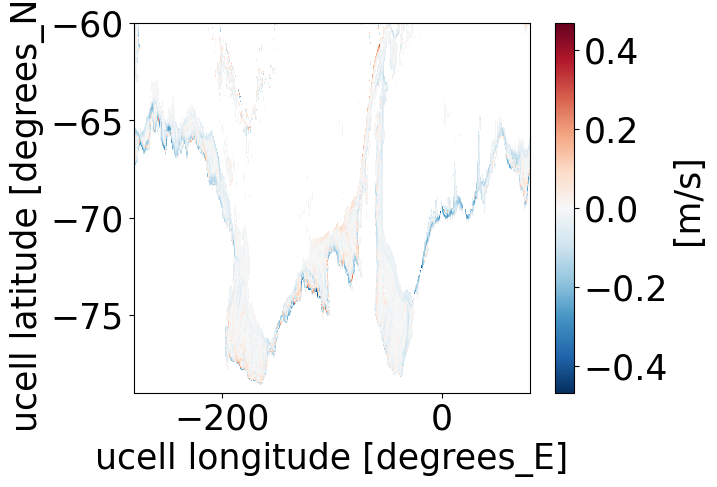

In [114]:
ualong_decademean.where(hu<2500).plot()

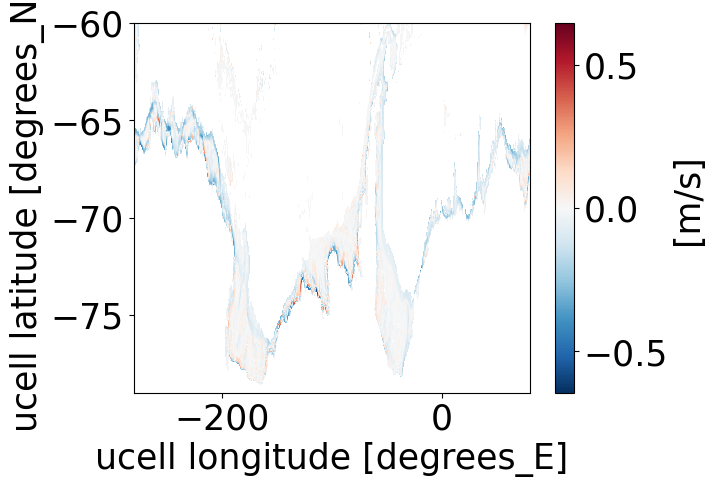

In [89]:
ualong_decademean.where(hu<2500).plot()

In [115]:
ualong_decademean.to_netcdf('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_wocluster_' + expt + '.nc')

## Plotting here and importing

In [119]:
ualong_decademean_wthmp = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_wocluster_' + exp_wthmp + '.nc').where(hu_region < 2000)
ualong_decademean_wthp = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_wocluster_' + exp_wthp + '.nc').where(hu_region < 2000)
ualong_decademean_ctrl = xr.open_mfdataset('/g/data/v45/qo9901/MW-perturb-ASC-data/ualong_decademean_wocluster_' + exp_ctrl + '.nc').where(hu_region < 2000)
ualong_decademean_wthmp

<xarray.Dataset> Size: 25MB
Dimensions:                        (yu_ocean: 440, xu_ocean: 3600)
Coordinates:
  * xu_ocean                       (xu_ocean) float64 29kB -279.9 ... 80.0
  * yu_ocean                       (yu_ocean) float64 4kB -78.98 ... -60.02
    geolon_c                       (yu_ocean, xu_ocean) float32 6MB nan ... 80.0
    geolat_c                       (yu_ocean, xu_ocean) float32 6MB nan ... -...
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) float64 13MB dask.array<chunksize=(69, 360), meta=np.ndarray>

In [93]:
cd Antarctic-Eddy-Res-Compare

[Errno 2] No such file or directory: 'Antarctic-Eddy-Res-Compare'
/home/561/qo9901/Antarctic-Eddy-Res-Compare


In [94]:
import cmocean
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [95]:
## importing masks for clusters

cluster_mask_access = xr.open_mfdataset('largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access

<xarray.Dataset> Size: 2MB
Dimensions:                        (yu_ocean: 440, xu_ocean: 3600)
Dimensions without coordinates: yu_ocean, xu_ocean
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) bool 2MB dask.array<chunksize=(440, 3600), meta=np.ndarray>

In [29]:
mask_bath_slopeshelf = xr.where((hu_region <2600),True,False)

In [30]:
land_mask = np.squeeze(hu.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yu_ocean = hu.yu_ocean.values
xu_ocean = hu.xu_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = hu.yu_ocean.values
land_mask_lat[0] = -80


In [31]:
levels_ualong = np.arange(-0.11,0.11,0.01)


In [32]:
def changeline_cs(linestyle):
    cs.monochrome = True
    for col,  ls in zip(cs.collections,cs._process_linestyles(linestyle)):
        col.set_linestyle(ls)
        col.set_edgecolor('k')
        #col.set_linewidth(2)


In [33]:
hu_region = hu_region#.where(cluster_mask_access == True)
hu_region

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -80.0 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [35]:
ualong_decademean_wthp

<xarray.Dataset> Size: 25MB
Dimensions:                        (xu_ocean: 3600, yu_ocean: 440)
Coordinates:
  * xu_ocean                       (xu_ocean) float64 29kB -279.9 ... 80.0
  * yu_ocean                       (yu_ocean) float64 4kB -78.98 ... -60.02
    geolon_c                       (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
    geolat_c                       (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 3600), meta=np.ndarray>
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) float64 13MB dask.array<chunksize=(440, 3600), meta=np.ndarray>

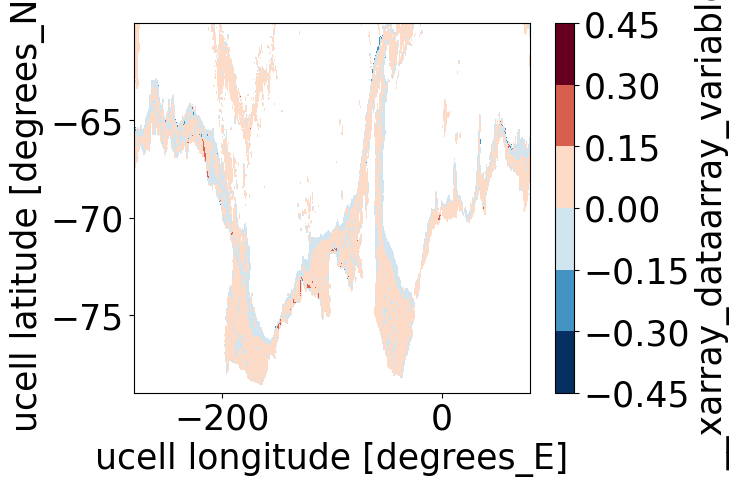

In [117]:
(ualong_decademean_wthmp.__xarray_dataarray_variable__ - ualong_decademean_wthp.__xarray_dataarray_variable__)\
.plot.contourf()

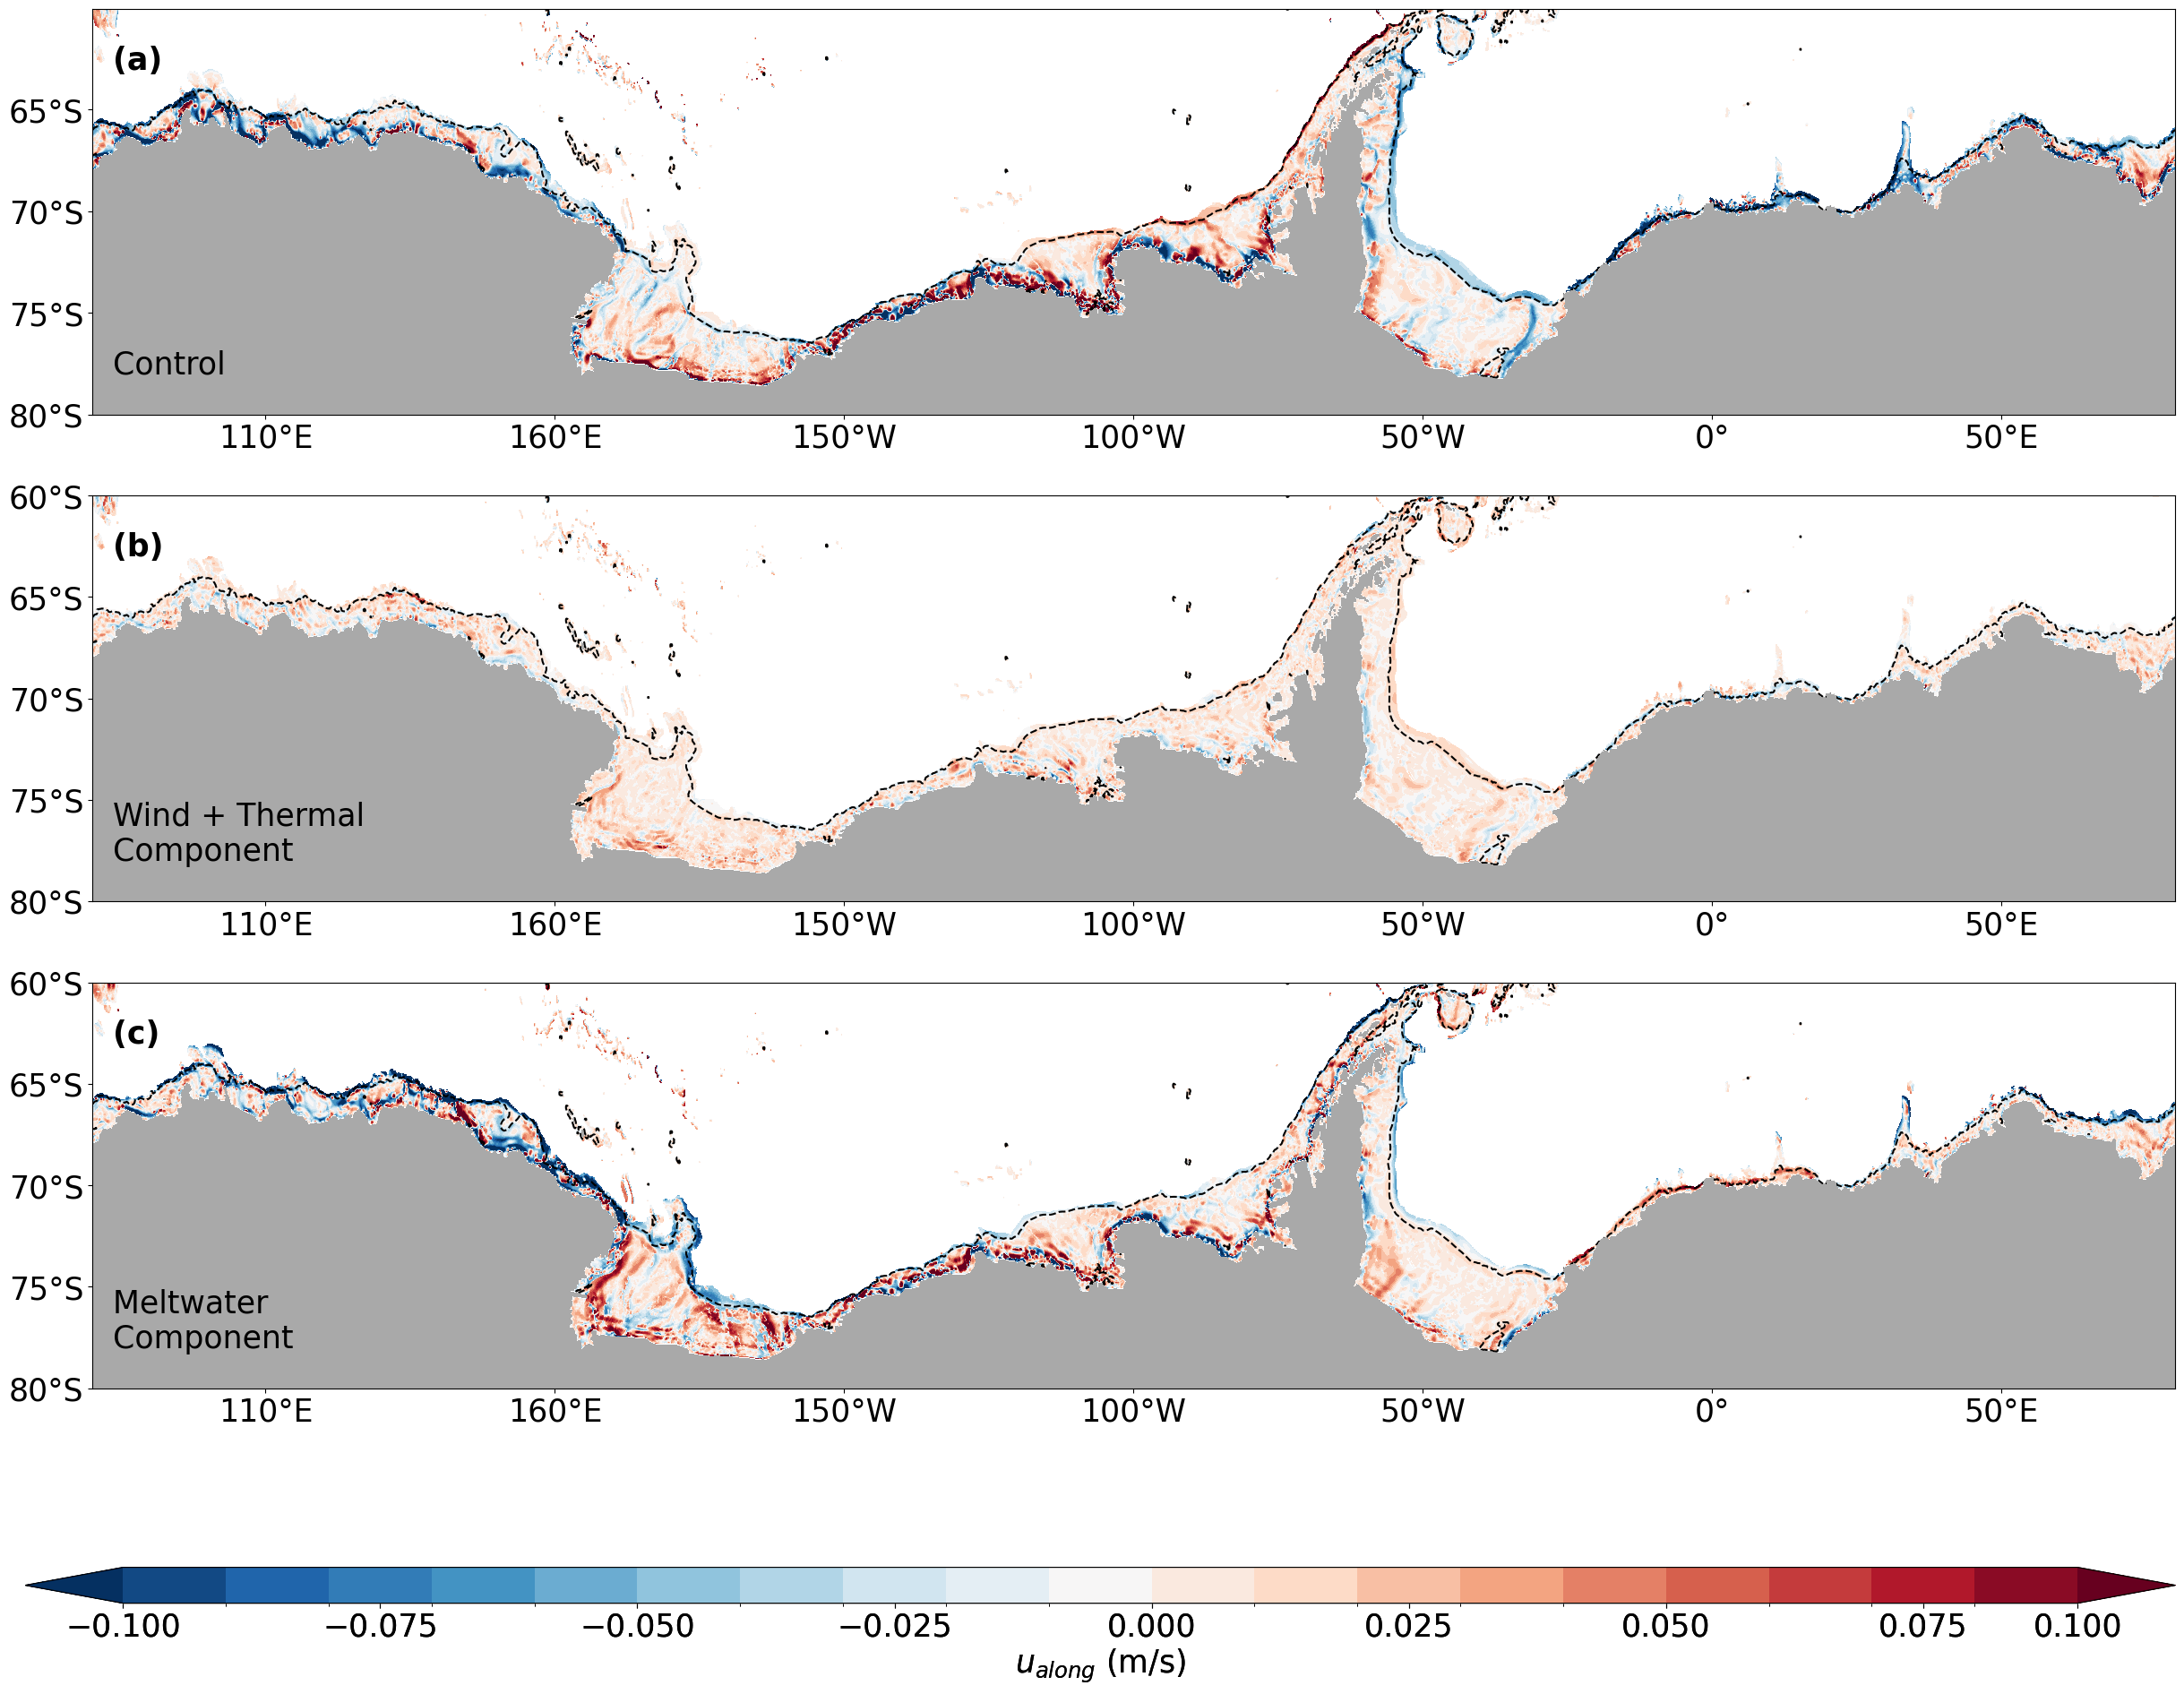

In [120]:
fig, ax = plt.subplots(nrows =3 ,figsize = (30,20))

# accessom2-01
cmap = ualong_decademean_ctrl.__xarray_dataarray_variable__.plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[0])
#cs = hu_region.where(hu_region < 2600).plot.contour(levels  = [2500], color = 'k', ax = ax[0])
#changeline_cs('solid')
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[0], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax[0].set_ylabel('')
ax[0].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].text(0.01,0.1,'Control',transform=ax[0].transAxes)
ax[0].set_xlabel('')
ax[0].text(0.01,0.85,'(a)', transform=ax[0].transAxes, fontweight = 'bold')



cmap = (ualong_decademean_wthp.__xarray_dataarray_variable__ - ualong_decademean_ctrl.__xarray_dataarray_variable__).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[1], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[1].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].set_ylim([-80,-60])
ax[1].text(0.01,0.1,'Wind + Thermal \nComponent',transform=ax[1].transAxes)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].text(0.01,0.85,'(b)', transform=ax[1].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.1)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))


cmap = (ualong_decademean_wthmp.__xarray_dataarray_variable__ - ualong_decademean_wthp.__xarray_dataarray_variable__).plot.contourf(levels  = np.arange(-0.1,0.1,0.01), add_colorbar = False, ax = ax[2])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[2], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[2].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[2].set_ylim([-80,-60])
ax[2].text(0.01,0.1,'Meltwater \nComponent',transform=ax[2].transAxes)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].text(0.01,0.85,'(c)', transform=ax[2].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$u_{along}$ (m/s)', orientation = 'horizontal', cax = cb_ax, pad = 0.01)
cbar.set_ticks(np.arange(-0.1,0.125,0.025))

for box in range(3):
    ax[box].yaxis.set_major_formatter(LatitudeFormatter())
    ax[box].xaxis.set_major_formatter(LongitudeFormatter())


In [ ]:
## submit as a pbs job



In [18]:
u_mean

<xarray.DataArray 'ug_s' (yu_ocean: 93, xu_ocean: 400)>
dask.array<mean_agg-aggregate, shape=(93, 400), dtype=float64, chunksize=(69, 60), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -270.0 -269.9 -269.8 ... -230.3 -230.2 -230.1
  * yu_ocean  (yu_ocean) float64 -66.98 -66.94 -66.9 ... -63.11 -63.07 -63.02
    geolon_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>